In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('munich-air-quality.csv')

In [3]:
df

,date,pm25,pm10,o3,no2,so2,co
0,2024/1/1,53,8,33,13,,
1,2024/1/2,14,6,32,10,,
2,2024/1/3,16,8,31,12,,
3,2024/1/4,18,16,16,26,,
4,2024/1/5,33,13,26,21,,
...,...,...,...,...,...,...,...
3333,2019/12/31,,,7,19,,
3334,2018/12/31,,,19,13,,
3335,2017/9/9,,,10,35,1,
3336,2016/3/31,,,18,35,26,


In [4]:
# set column types
df['date'] = pd.to_datetime(df['date'])
df.rename(columns={' pm10':'pm10', ' pm25':'pm25', ' o3':'o3', ' no2':'no2', ' so2':'so2', ' co':'co' }, inplace=True)
df.replace(' ', np.nan, inplace=True)
df['pm10'] = pd.to_numeric(df['pm10'], downcast='float')
df['pm25'] = pd.to_numeric(df['pm25'], downcast='float')
df['o3'] = pd.to_numeric(df['o3'], downcast='float')
df['no2'] = pd.to_numeric(df['no2'], downcast='float')
df['so2'] = pd.to_numeric(df['so2'], downcast='float')
df['co'] = pd.to_numeric(df['co'], downcast='float')

In [5]:
# Check for missing values
print(df.isnull().sum())

date       0
pm25    3049
pm10       8
o3        28
no2       16
so2     2066
co      3338
dtype: int64


In [6]:
# Drop rows with missing values
df_cleaned = df.dropna()

In [7]:
# Display summary statistics
df[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].describe()

,pm25,pm10,o3,no2,so2,co
count,289.000000,3330.000000,3310.000000,3322.000000,1272.000000,0.0
mean,40.401382,21.573574,27.712992,28.740519,28.666666,NaN
std,15.150798,11.534561,13.552036,10.836947,11.411710,NaN
min,6.000000,4.000000,1.000000,2.000000,1.000000,NaN
25%,29.000000,15.000000,19.000000,21.000000,23.000000,NaN
50%,39.000000,19.000000,27.000000,27.000000,31.000000,NaN
75%,51.000000,26.000000,36.000000,36.000000,37.000000,NaN
max,110.000000,304.000000,85.000000,75.000000,52.000000,NaN


In [12]:
# check renaming columns
df.columns

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2'], dtype='object')

In [ ]:
# drop column co as it is null
df.drop(columns=[' co'], inplace=True)

In [9]:
# check data quality and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3338 entries, 0 to 3337
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3338 non-null   datetime64[ns]
 1   pm25    289 non-null    float32       
 2   pm10    3330 non-null   float32       
 3   o3      3310 non-null   float32       
 4   no2     3322 non-null   float32       
 5   so2     1272 non-null   float32       
dtypes: datetime64[ns](1), float32(5)
memory usage: 91.4 KB


In [13]:
df

,date,pm25,pm10,o3,no2,so2
0,2024-01-01,53.0,8.0,33.0,13.0,NaN
1,2024-01-02,14.0,6.0,32.0,10.0,NaN
2,2024-01-03,16.0,8.0,31.0,12.0,NaN
3,2024-01-04,18.0,16.0,16.0,26.0,NaN
4,2024-01-05,33.0,13.0,26.0,21.0,NaN
...,...,...,...,...,...,...
3333,2019-12-31,NaN,NaN,7.0,19.0,NaN
3334,2018-12-31,NaN,NaN,19.0,13.0,NaN
3335,2017-09-09,NaN,NaN,10.0,35.0,1.0
3336,2016-03-31,NaN,NaN,18.0,35.0,26.0


In [26]:
# get year, month and day from date column
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

In [37]:
# see trend along year how metrics are changing 
df[['pm25','pm10','o3','no2','so2']].groupby([df["year"]]).mean()

,pm25,pm10,o3,no2,so2
year,,,,,
2014,NaN,20.528986,16.803030,33.742645,24.661764
2015,NaN,23.870878,27.462811,38.391186,33.856750
2016,NaN,22.010792,25.927008,37.072201,32.039711
2017,NaN,24.504154,26.667589,35.662048,29.531857
2018,NaN,23.405556,30.036516,30.764706,9.511111
2019,NaN,21.727272,28.723757,28.407713,NaN
2020,NaN,20.917582,27.369146,24.178572,NaN
2021,NaN,19.958677,27.033150,22.520660,NaN
2022,NaN,19.117807,28.978022,21.435616,NaN


In [38]:
# see trend in year 2023 how metrics are changing 
df.loc[df.year==2023][['pm25','pm10','o3','no2','so2']].groupby([df["month"]]).mean()

,pm25,pm10,o3,no2,so2
month,,,,,
1,NaN,19.419355,19.433332,18.799999,NaN
2,NaN,25.821428,22.607143,19.250000,NaN
3,26.750000,23.000000,28.258064,20.612904,NaN
4,37.851852,15.766666,33.066666,18.900000,NaN
5,44.258064,19.258064,36.322582,18.032259,NaN
6,49.133335,20.333334,51.033333,21.900000,NaN
7,39.935482,18.903225,38.193550,25.709677,NaN
8,36.741936,16.000000,37.161289,19.870968,NaN
9,48.200001,20.066668,36.533333,23.066668,NaN


In [41]:
# map month to  seasons
seasons = [1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1]
month_to_season = dict(zip(range(1,13), seasons))
df['season_id'] = df.date.dt.month.map(month_to_season)

In [42]:
df

,date,pm25,pm10,o3,no2,so2,year,month,day,season_id
0,2024-01-01,53.0,8.0,33.0,13.0,NaN,2024,1,1,1
1,2024-01-02,14.0,6.0,32.0,10.0,NaN,2024,1,2,1
2,2024-01-03,16.0,8.0,31.0,12.0,NaN,2024,1,3,1
3,2024-01-04,18.0,16.0,16.0,26.0,NaN,2024,1,4,1
4,2024-01-05,33.0,13.0,26.0,21.0,NaN,2024,1,5,1
...,...,...,...,...,...,...,...,...,...,...
3333,2019-12-31,NaN,NaN,7.0,19.0,NaN,2019,12,31,1
3334,2018-12-31,NaN,NaN,19.0,13.0,NaN,2018,12,31,1
3335,2017-09-09,NaN,NaN,10.0,35.0,1.0,2017,9,9,4
3336,2016-03-31,NaN,NaN,18.0,35.0,26.0,2016,3,31,2


In [46]:
# create seasons data frame
data = {'season': ['spring', 'summer', 'autumn', 'winter'], 'season_id': [2, 3, 4, 1]} 
# Create DataFrame  
seasons_df = pd.DataFrame(data)  
df = pd.merge(df, seasons_df, on=["season_id"])

In [47]:
# see trend along seaons for year 2023, how metrics are changing 
df.loc[df.year==2023][['pm25','pm10','o3','no2','so2']].groupby([df["season"]]).mean()

,pm25,pm10,o3,no2,so2
season,,,,,
autumn,40.166668,18.230770,27.472527,21.967033,NaN
spring,39.515152,19.380434,32.543480,19.184782,NaN
summer,41.858696,18.391304,42.032608,22.500000,NaN
winter,37.774193,21.500000,21.168539,19.561798,NaN


In [51]:
df.columns

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'year', 'month', 'day',
       'season_id', 'season'],
      dtype='object')

<Axes: xlabel='date'>

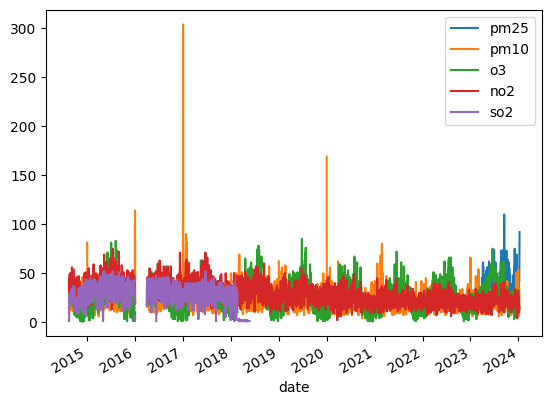

In [55]:
# see trend along the years
df.set_index('date')[['pm25', 'pm10', 'o3', 'no2', 'so2']].plot()

<Axes: xlabel='month'>

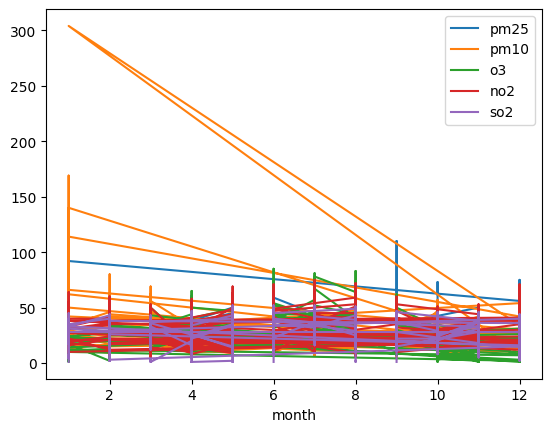

In [56]:
# see trend along the months
df.set_index('month')[['pm25', 'pm10', 'o3', 'no2', 'so2']].plot()

<Axes: xlabel='season'>

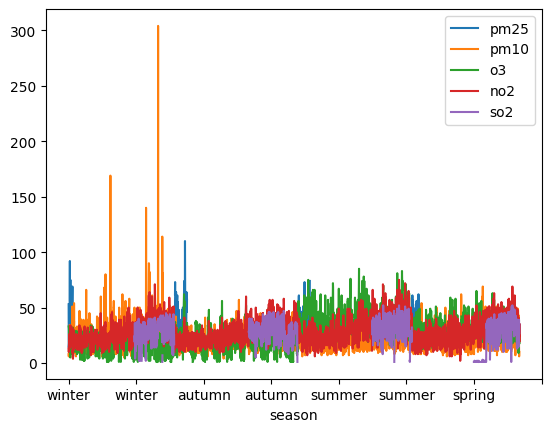

In [57]:
# see trend along the season
df.set_index('season')[['pm25', 'pm10', 'o3', 'no2', 'so2']].plot()